In [1]:
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
label_encoder = LabelEncoder()

In [66]:
data_dir = './accuracy-check'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.4, random_state=16)

In [67]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.metrics import f1_score
import joblib

# Load the saved model
model = load_model('new_mango.h5')

# Prepare test data
test_images = []
for image_path in test_image_paths:
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    test_images.append(img_array_expanded_dims)

test_images = np.vstack(test_images)

# Predict the probabilities
probabilities = model.predict(test_images)

# Convert probabilities to class labels
predictions = np.argmax(probabilities, axis=-1)

# Convert test labels to encoded form
encoded_test_labels = label_encoder.transform(test_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(encoded_test_labels, predictions)
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(encoded_test_labels, predictions, average='macro')
print(f'F1 Score: {f1}')

11/11 [==============================] - 1s 120ms/step
[[189   5]
 [ 12 138]]
F1 Score: 0.949470773750378


In [68]:
# Predict the probabilities
probabilities = model.predict(test_images)

# Convert probabilities to class labels
predictions = np.argmax(probabilities, axis=-1)

# The rest of your code remains the same
encoded_test_labels = label_encoder.transform(test_labels)
conf_matrix = confusion_matrix(encoded_test_labels, predictions)
print(conf_matrix)

11/11 [==============================] - 1s 118ms/step
[[189   5]
 [ 12 138]]


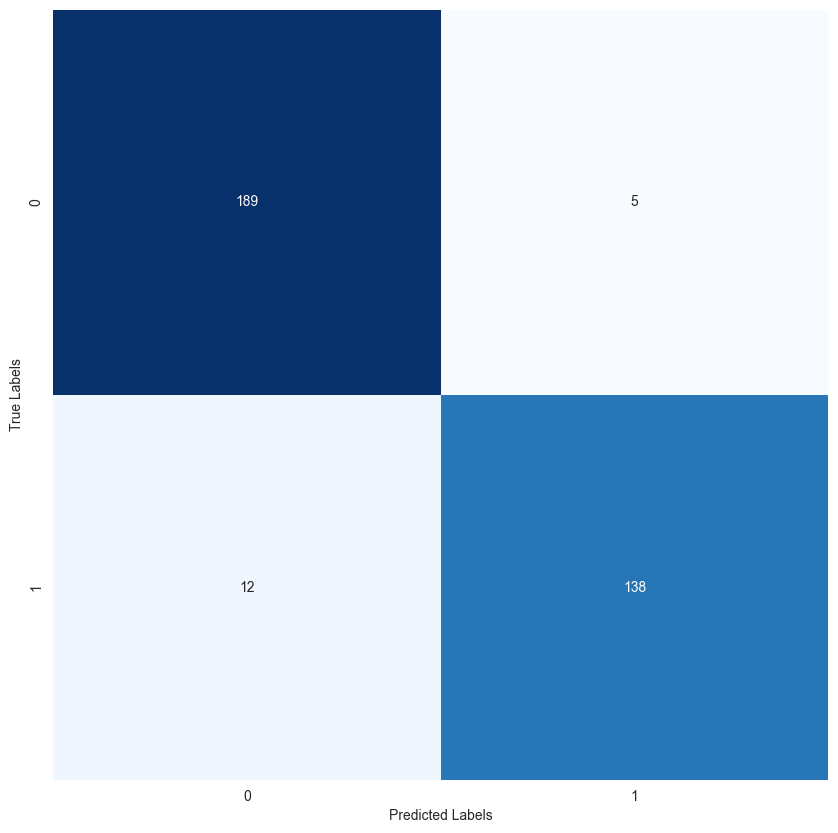

In [69]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [70]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(encoded_test_labels, predictions, average='macro')
print(f'F1 Score: {f1}')

F1 Score: 0.949470773750378
